resize image

In [7]:
import os, sys
from PIL import Image
from os import listdir
from os.path import isfile, join

infolder = "small_data"
#print(len(listdir(infolder)))
onlyfiles = [f for f in listdir(infolder) if isfile(join(infolder, f))]
print(len(onlyfiles))

6


In [8]:
for infile in onlyfiles:
    print(infile)

12_05_2017_12_40_42_0501.jpg
26_05_2017_12_13_17_0001.jpg
26_05_2017_12_13_17_0038.jpg
26_05_2017_12_13_17_0218.jpg
26_05_2017_12_13_17_0477.jpg
26_05_2017_12_13_17_0488.jpg


Try for one file

In [18]:
outfile = 'out.thumbnail.jpg'
im = Image.open(join(infolder, onlyfiles[3]))
outsize = 256,256
im.thumbnail(outsize, Image.ANTIALIAS)
im.save(outfile, "JPEG")
#im.show()

show that file
refers to https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook

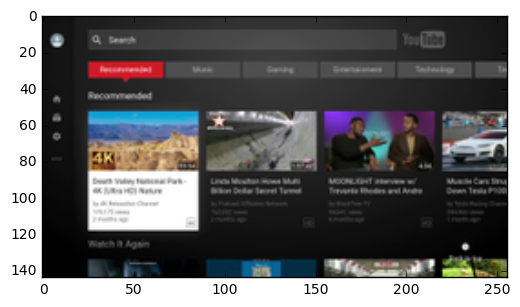

In [23]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
imshow(np.asarray(im))

Try for all file

small_data/12_05_2017_12_40_42_0501.thumbnail.jpg
(36, 64)


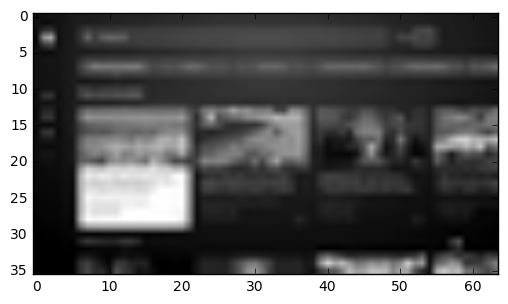

small_data/26_05_2017_12_13_17_0001.thumbnail.jpg
(36, 64)


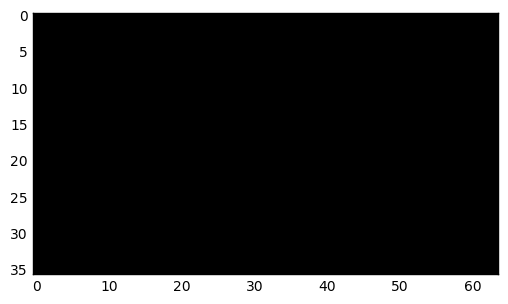

small_data/26_05_2017_12_13_17_0038.thumbnail.jpg
(36, 64)


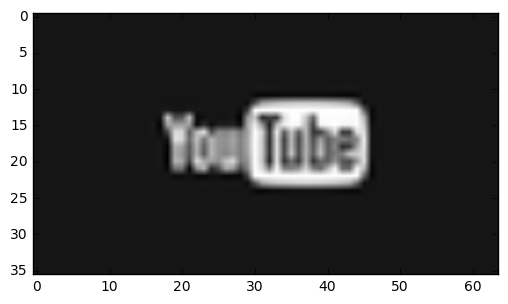

small_data/26_05_2017_12_13_17_0218.thumbnail.jpg
(36, 64)


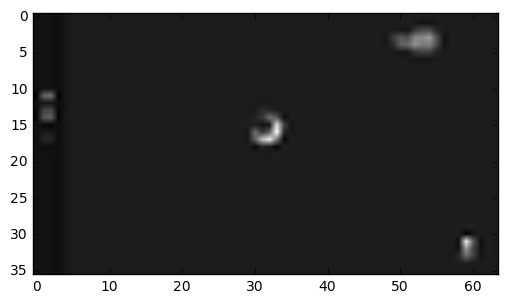

small_data/26_05_2017_12_13_17_0477.thumbnail.jpg
(36, 64)


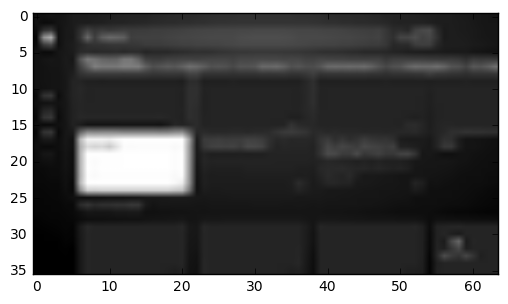

small_data/26_05_2017_12_13_17_0488.thumbnail.jpg
(36, 64)


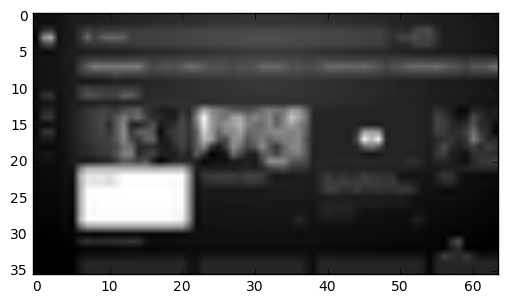

In [65]:
def save_thumbnails(infiles, infolder, outfolder, size, appendname = '', verbose=False):
    outsize = size, size
    for infile in infiles:
        if appendname:
            outfilename = join(outfolder, "{}.{}.jpg".format(os.path.splitext(infile)[0], appendname))
        else:
            outfilename = join(outfolder, infile)
        im = Image.open(join(infolder, infile)).convert('L')
        im.thumbnail(outsize, Image.ANTIALIAS)
        im.save(outfilename, "JPEG")
        if verbose:
            print(outfilename)
            print(np.asarray(im).shape)
            imshow(np.asarray(im), cmap = plt.get_cmap('gray'))
            plt.show()

save_thumbnails(onlyfiles, infolder, infolder, 64, 'thumbnail', True)

In [57]:
imgdata = np.asarray(im)
print(imgdata.shape)

(144, 256, 3)


In [60]:
from os import mkdir
from os import path
from os import listdir
from os.path import isfile, join

youtube_img_folder_root = '/Users/peli/Google Drive/CS231n/YouTubeLaunch_Labled'
youtube_img_folders = ['Logo','TextLoaded','ImageLoaded','SpinLoading','WhiteScreen']
thumbnail_folder_root   = '/Users/peli/Google Drive/CS231n/Thumbnails'
for subfolder in youtube_img_folders:
    thumbnail_folder = join(thumbnail_folder_root, subfolder)
    if not path.exists(thumbnail_folder):
        mkdir(thumbnail_folder)

In [62]:
for subfolder in youtube_img_folders:
    img_folder = join(youtube_img_folder_root, subfolder)
    img_files  = [f for f in listdir(img_folder) if isfile(join(img_folder, f)) and os.path.splitext(f)[1]=='.jpg']
    print('{} files in folder {}'.format(len(img_files), img_folder))
    save_thumbnails(img_files, img_folder, join(thumbnail_folder_root, subfolder), 64, 'thumbnail', False)


1095 files in folder /Users/peli/Google Drive/CS231n/YouTubeLaunch_Labled/Logo
293 files in folder /Users/peli/Google Drive/CS231n/YouTubeLaunch_Labled/TextLoaded
1075 files in folder /Users/peli/Google Drive/CS231n/YouTubeLaunch_Labled/ImageLoaded
1096 files in folder /Users/peli/Google Drive/CS231n/YouTubeLaunch_Labled/SpinLoading
1094 files in folder /Users/peli/Google Drive/CS231n/YouTubeLaunch_Labled/WhiteScreen


In [63]:
img_folder = join(youtube_img_folder_root, 'Logo')
files = listdir(img_folder)
print(len(files))

1097


In [64]:
print(os.path.splitext(files[0]))

('12_05_2017_10_11_36_0101', '.jpg')
